## TF-DNNRegressor - ReLU - Spitzer Calibration Data

This script show a simple example of using [tf.contrib.learn][1] library to create our model.

The code is divided in following steps:

 - Load CSVs data
 - Filtering Categorical and Continuous features
 - Converting Data into Tensors
 - Selecting and Engineering Features for the Model
 - Defining The Regression Model
 - Training and Evaluating Our Model
 - Predicting output for test data

*v0.1: Added code for data loading, modeling and  prediction model.*

*v0.2: Removed unnecessary output logs.*

*PS: I was able to get a score of 1295.07972 using this script with 70% (of train.csv) data used for training and rest for evaluation. Script took 2hrs for training and 3000 steps were used.*

[1]: https://www.tensorflow.org/versions/r0.11/tutorials/tflearn/index.html#tf-contrib-learn-quickstart

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, minmax_scale

from sklearn.metrics import r2_score

from time import time
start0 = time()
plt.rcParams['figure.dpi'] = 300

/Users/jonathan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load CSVs data

In [2]:
nSkip = 20
spitzerDataRaw  = pd.read_csv('pmap_ch2_0p1s_x4_rmulti_s3_7.csv')[::nSkip]

In [3]:
PLDpixels = pd.DataFrame({key:spitzerDataRaw[key] for key in spitzerDataRaw.columns.values if 'pix' in key})
PLDpixels

pix1         pix2         pix3         pix4         pix5  \
0        577.447021  3465.876709  1118.598145   550.165466  2460.376953   
20       291.785248   696.303345   434.420410  1808.774414  4967.067383   
40       377.656250   981.755493   432.597595  1676.837646  4871.034668   
60       957.022339  2441.827637   402.665283  1260.974243  3135.986084   
80      1322.453613  2773.945801   352.199768  1200.719727  2465.056885   
100     2007.827271  1886.431885   323.229889  1844.838623  1875.485474   
120     1566.299927  2280.376465   337.545166  1578.394043  2318.075195   
140      584.764038  3915.067871   517.304016   605.464722  2961.010010   
160      543.166992  3069.214844   476.013794   665.751648  3757.745605   
180      451.328369  2087.002930   467.328674   852.749023  4688.578125   
200      350.573456  1315.519043   492.374207   951.983887  5410.908691   
220      348.076660  1362.047607   498.790955   827.281433  5530.880859   
240      579.250000  3397.274414   475.278137   670.108032  3423.658203   
260      350.787445  1008.846680   676.405518   669.405518  4093.391113   
280      236.634949   493.823120   548.321777   678.572510  4737.148438   
300      231.696365   396.443329   532.151245   705.671692  3865.480713   
320      388.209534  1274.972656   786.391357   668.139648  3834.410645   
340      468.711243  1828.344482   939.319092   633.075684  3413.272949   
360      566.607727  3199.396973  1363.388428   557.654236  2245.422607   
380      506.795410  3159.170654   717.527649   610.504089  3377.698242   
400      450.508301  2331.235596   571.043701   660.036743  4318.423340   
420      579.428467  3765.572754   958.830811   548.711914  2622.649170   
440      446.872070  1672.167480  1234.078369   597.369141  2740.287354   
460      187.009293   472.814728   468.026794  1143.611328  5519.829102   
480      379.277435  1345.949463   473.098663  1099.639893  5219.842285   
500      423.313690  1454.232056   467.154480  1189.994141  4994.313477   
520      581.744385  1965.211304   448.220428  1174.853149  4270.922852   
540     1104.622314  3327.730469   378.166748   961.997498  2600.892822   
560     1313.117676  2412.868164   384.651062  1400.491821  2646.587402   
580     1036.286621  1455.090576   378.979675  2104.846191  3048.426758   
...             ...          ...          ...          ...          ...   
784700   490.277069  2778.427246   578.676941   669.761353  3909.416016   
784720   488.245300  2811.830566   570.076233   699.562134  3940.356445   
784740   528.388733  3077.244873   552.288025   664.305908  3693.994141   
784760   524.138672  3079.202393   581.365173   653.116577  3608.978760   
784780   515.400085  3104.853027   577.355774   622.147217  3662.642090   
784800   507.664368  2975.806396   563.121521   630.466675  3742.873779   
784820   525.488770  3126.275635   539.566467   651.108948  3622.288330   
784840   542.380615  3485.441895   591.489502   615.051270  3340.654541   
784860   564.337219  3457.292480   603.931641   613.116577  3290.934326   
784880   519.687866  3092.465088   562.407776   678.326660  3722.915771   
784900   504.459045  2937.398438   579.616455   651.453796  3756.773438   
784920   535.473450  3312.164062   639.049072   612.776123  3343.647461   
784940   523.319702  3217.937012   691.253662   631.950073  3356.177002   
784960   526.920349  3194.552002   628.663696   666.446594  3468.737305   
784980   523.742554  3142.258545   656.946533   604.927246  3421.854004   
785000   517.568970  3081.646973   599.225220   677.949646  3638.717285   
785020   521.389893  3125.872314   584.240967   663.873535  3560.931885   
785040   486.011292  2723.162598   601.634949   643.771729  3938.919189   
785060   511.766632  2929.545654   548.445679   666.829224  3825.424072   
785080   509.366058  3109.286133   620.603149   650.118958  3605.497803   
785100   515.094360  3108.921387   573.314392   662.386719  3644.168213   
785120   544.855469  3295.288086   559.2

In [4]:
PLDnorm = np.sum(np.array(PLDpixels),axis=1)

In [5]:
PLDpixels = (PLDpixels.T / PLDnorm).T
PLDpixels

pix1      pix2      pix3      pix4      pix5      pix6      pix7  \
0       0.054868  0.329321  0.106287  0.052276  0.233781  0.094484  0.013468   
20      0.028092  0.067038  0.041825  0.174144  0.478215  0.027815  0.044853   
40      0.036078  0.093787  0.041326  0.160189  0.465331  0.029684  0.040539   
60      0.093836  0.239420  0.039481  0.123638  0.307482  0.039297  0.034649   
80      0.132691  0.278329  0.035339  0.120477  0.247336  0.042554  0.033455   
100     0.206683  0.194186  0.033273  0.189905  0.193059  0.034384  0.044045   
120     0.158412  0.230632  0.034139  0.159635  0.234445  0.036018  0.038561   
140     0.054803  0.366910  0.048480  0.056743  0.277498  0.060103  0.020930   
160     0.050925  0.287756  0.044629  0.062418  0.352310  0.055959  0.025035   
180     0.041935  0.193913  0.043422  0.079233  0.435637  0.047685  0.029593   
200     0.032415  0.121637  0.045526  0.088023  0.500310  0.044154  0.034224   
220     0.031517  0.123327  0.045163  0.074907  0.500796  0.057298  0.030430   
240     0.054281  0.318357  0.044538  0.062796  0.320830  0.056471  0.024218   
260     0.032804  0.094344  0.063255  0.062600  0.382799  0.207081  0.022325   
280     0.022066  0.046049  0.051131  0.063277  0.441742  0.191033  0.032949   
300     0.021969  0.037589  0.050457  0.066910  0.366512  0.279242  0.030398   
320     0.036246  0.119040  0.073423  0.062382  0.358006  0.195215  0.020614   
340     0.044072  0.171917  0.088323  0.059527  0.320947  0.165366  0.017075   
360     0.054328  0.306766  0.130725  0.053469  0.215297  0.112741  0.012219   
380     0.046987  0.292900  0.066525  0.056602  0.313161  0.080698  0.019573   
400     0.041459  0.214537  0.052551  0.060741  0.397412  0.077511  0.024054   
420     0.054154  0.351935  0.089614  0.051283  0.245116  0.084033  0.015222   
440     0.043135  0.161408  0.119121  0.057662  0.264509  0.210548  0.014628   
460     0.017713  0.044785  0.044331  0.108322  0.522836  0.036686  0.049110   
480     0.035173  0.124818  0.043873  0.101976  0.484068  0.039134  0.035500   
500     0.039700  0.136382  0.043811  0.111601  0.468382  0.036770  0.034613   
520     0.055303  0.186820  0.042610  0.111686  0.406010  0.036385  0.034884   
540     0.107603  0.324160  0.036838  0.093710  0.253357  0.045265  0.031082   
560     0.130815  0.240374  0.038320  0.139520  0.263658  0.037162  0.036075   
580     0.103735  0.145659  0.037937  0.210701  0.305156  0.031453  0.042582   
...          ...       ...       ...       ...       ...       ...       ...   
784700  0.045754  0.259291  0.054004  0.062504  0.364839  0.065790  0.023442   
784720  0.045032  0.259344  0.052580  0.064523  0.363431  0.064429  0.023380   
784740  0.048967  0.285174  0.051182  0.061563  0.342330  0.063945  0.023237   
784760  0.048930  0.287454  0.054272  0.060971  0.336911  0.066126  0.022740   
784780  0.047993  0.289115  0.053762  0.057933  0.341054  0.066315  0.020755   
784800  0.047373  0.277691  0.052548  0.058833  0.349271  0.068074  0.021494   
784820  0.048948  0.291203  0.050259  0.060649  0.337405  0.066502  0.022353   
784840  0.050173  0.322418  0.054715  0.056895  0.309025  0.066103  0.019764   
784860  0.052741  0.323108  0.056442  0.057300  0.307560  0.065847  0.019869   
784880  0.048050  0.285929  0.052000  0.062718  0.344220  0.062762  0.021256   
784900  0.046869  0.272910  0.053851  0.060526  0.349037  0.069016  0.022654   
784920  0.050058  0.309632  0.059740  0.057284  0.312575  0.070992  0.020015   
784940  0.048986  0.301217  0.064705  0.059154  0.314157  0.070606  0.021059   
784960  0.049263  0.298666  0.058775  0.062308  0.324300  0.064444  0.020885   
784980  0.049169  0.294994  0.061674  0.056790  0.321242  0.074577  0.019480   
785000  0.048029  0.285969  0.055607  0.062912  0.337663  0.066045  0.021197   
785020  0.048715  0.292062  0.054588  0.062028  0.332711  0.066963  0.021075   
785040  0.045252  0.253553  0.056018  0.059941  0.366752  0.071196  0.021665   
785060  0.04

In [6]:
spitzerData = spitzerDataRaw.copy()
for key in spitzerDataRaw.columns: 
    if key in PLDpixels.columns:
        spitzerData[key] = PLDpixels[key]

In [7]:
testPLD = np.array(pd.DataFrame({key:spitzerData[key] for key in spitzerData.columns.values if 'pix' in key}))
assert(not sum(abs(testPLD - np.array(PLDpixels))).all())
print('Confirmed that PLD Pixels have been Normalized to Spec')

Confirmed that PLD Pixels have been Normalized to Spec


In [8]:
notFeatures     = ['flux', 'fluxerr', 'xerr', 'yerr', 'xycov']
feature_columns = spitzerData.drop(notFeatures,axis=1).columns.values
features        = spitzerData.drop(notFeatures,axis=1).values
labels          = spitzerData['flux'].values

In [9]:
stdScaler = StandardScaler()

In [11]:
features_scaled = stdScaler.fit_transform(features)
labels_scaled   = stdScaler.fit_transform(labels[:,None]).ravel()

x_valtest, x_train, y_valtest, y_train = train_test_split(features_scaled, labels_scaled, test_size=0.6, random_state=42)
x_val, x_test, y_val, y_test           = train_test_split(x_valtest, y_valtest, test_size=0.5, random_state=42)

# x_val   = minmax_scale(x_val.astype('float32'))
# x_train = minmax_scale(x_train.astype('float32'))
# x_test  = minmax_scale(x_test.astype('float32'))

# y_val   = minmax_scale(y_val.astype('float32'))
# y_train = minmax_scale(y_train.astype('float32'))
# y_test  = minmax_scale(y_test.astype('float32'))

print(x_val.shape[0]  , 'validation samples')
print(x_train.shape[0], 'train samples')
print(x_test.shape[0] , 'test samples')

7853 validation samples
23559 train samples
7853 test samples


In [12]:
train_df    = pd.DataFrame(np.c_[x_train, y_train], columns=list(feature_columns) + ['flux'])
test_df     = pd.DataFrame(np.c_[x_test , y_test ], columns=list(feature_columns) + ['flux'])
evaluate_df = pd.DataFrame(np.c_[x_val  , y_val  ], columns=list(feature_columns) + ['flux'])

## Filtering Categorical and Continuous features

We store Categorical, Continuous and Target features names in different variables. This will be helpful in later steps.

In [14]:
# categorical_features = [feature for feature in features if 'cat' in feature]
categorical_features  = []
continuous_features   = [feature for feature in train_df.columns]# if 'cat' in feature]
LABEL_COLUMN          = 'flux'

## Converting Data into Tensors

> When building a TF.Learn model, the input data is specified by means of an Input Builder function. This builder function will not be called until it is later passed to TF.Learn methods such as fit and evaluate. The purpose of this function is to construct the input data, which is represented in the form of Tensors or SparseTensors.

> Note that input_fn will be called while constructing the TensorFlow graph, not while running the graph. What it is returning is a representation of the input data as the fundamental unit of TensorFlow computations, a Tensor (or SparseTensor).

[More detail][2] on input_fn.

[2]: https://www.tensorflow.org/versions/r0.11/tutorials/input_fn/index.html#building-input-functions-with-tf-contrib-learn

In [15]:
# Converting Data into Tensors
def input_fn(df, training = True):
    # Creates a dictionary mapping from each continuous feature column name (k) to
    # the values of that column stored in a constant Tensor.
    continuous_cols = {k: tf.constant(df[k].values)
                       for k in continuous_features}

    # Creates a dictionary mapping from each categorical feature column name (k)
    # to the values of that column stored in a tf.SparseTensor.
    # categorical_cols = {k: tf.SparseTensor(
    #     indices=[[i, 0] for i in range(df[k].size)],
    #     values=df[k].values,
    #     shape=[df[k].size, 1])
    #     for k in categorical_features}

    # Merges the two dictionaries into one.
    feature_cols = continuous_cols
    # feature_cols = dict(list(continuous_cols.items()) + list(categorical_cols.items()))
    
    if training:
        # Converts the label column into a constant Tensor.
        label = tf.constant(df[LABEL_COLUMN].values)

        # Returns the feature columns and the label.
        return feature_cols, label
    
    # Returns the feature columns    
    return feature_cols

def train_input_fn():
    return input_fn(train_df, training=True)

def eval_input_fn():
    return input_fn(evaluate_df, training=True)

# def test_input_fn():
#     return input_fn(test_df.drop(LABEL_COLUMN,axis=1), training=False)

def test_input_fn():
    return input_fn(test_df, training=False)

## Selecting and Engineering Features for the Model

We use tf.learn's concept of [FeatureColumn][FeatureColumn] which help in transforming raw data into suitable input features. 

These engineered features will be used when we construct our model.

[FeatureColumn]: https://www.tensorflow.org/versions/r0.11/tutorials/linear/overview.html#feature-columns-and-transformations

In [16]:
engineered_features = []

for continuous_feature in continuous_features:
    engineered_features.append(
        tf.contrib.layers.real_valued_column(continuous_feature))


# for categorical_feature in categorical_features:
#     sparse_column = tf.contrib.layers.sparse_column_with_hash_bucket(
#         categorical_feature, hash_bucket_size=1000)

#     engineered_features.append(tf.contrib.layers.embedding_column(sparse_id_column=sparse_column, dimension=16,
#                                                                   combiner="sum"))

## Defining The Regression Model

Following is the simple DNNRegressor model. More detail about hidden_units, etc can be found [here][123].

**model_dir** is used to save and restore our model. This is because once we have trained the model we don't want to train it again, if we only want to predict on new data-set.

[123]: https://www.tensorflow.org/versions/r0.9/api_docs/python/contrib.learn.html#DNNRegressor

In [24]:
# train_df = df_train_ori.head(1000)
# evaluate_df = df_train_ori.tail(500)

# test_df = df_test_ori.head(1000)

# MODEL_DIR = "tf_model_spitzer/withNormalization_drop50/relu"
MODEL_DIR = "tf_model_spitzer/adamOptimizer_with_drop50/tanh/"
# MODEL_DIR = "tf_model_spitzer/xgf"

print("train_df.shape = "   , train_df.shape)
print("test_df.shape = "    , test_df.shape)
print("evaluate_df.shape = ", evaluate_df.shape)

train_df.shape =  (23559, 20)
test_df.shape =  (7853, 20)
evaluate_df.shape =  (7853, 20)


In [28]:
nHidden1  = 10
nHidden2  = 5
nHidden3  = 10

regressor = tf.contrib.learn.DNNRegressor(activation_fn=tf.nn.relu, dropout=0.5, optimizer=tf.train.AdamOptimizer,
    feature_columns=engineered_features, hidden_units=[nHidden1, nHidden2, nHidden3], model_dir=MODEL_DIR)

## Training and Evaluating Our Model

add progress bar through python `logging`

In [ ]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [96]:
# Training Our Model
nFitSteps = 100000
start = time()
wrap  = regressor.fit(input_fn=train_input_fn, steps=nFitSteps)
print('TF Regressor took {} seconds'.format(time()-start))

TF Regressor took 1062.6561288833618 seconds


In [29]:
# Evaluating Our Model
print('Evaluating ...')
results = regressor.evaluate(input_fn=eval_input_fn, steps=1)

for key in sorted(results):
    print("{}: {}".format(key, results[key]))

print("Val Acc: {:.3f}".format((1-results['loss'])*100))

Evaluating ...
global_step: 100002
loss: 0.356687068939209
Val Acc: 64.331


**Track Scalable Growth**

Shrunk data set to 23559 Training samples and 7853 Val/Test samples

| n_iters | time (s) | val acc | multicore | gpu |
|------------------------------------------------|
|  100    |   5.869  |  6.332 | yes | no |
|  200    |   6.380  | 13.178 | yes | no |
|  500    |   8.656  | 54.220 | yes | no |
|  1000   |  12.170  | 66.596 | yes | no |
|  2000   |  19.891  | 62.996 | yes | no |
|  5000   |  43.589  | 76.586 | yes | no |
|  10000  |  80.581  | 66.872 | yes | no |
|  20000  | 162.435  | 78.927 | yes | no |
|  50000  | 535.584  | 75.493 | yes | no |
|  100000 | 1062.656 | 73.162 | yes | no |

In [98]:
nItersList = [100,200,500,1000,2000,5000,10000,20000,50000,100000]
rtimesList = [5.869, 6.380, 8.656, 12.170, 19.891, 43.589, 80.581, 162.435, 535.584, 1062.656]
valAccList = [6.332, 13.178, 54.220, 66.596, 62.996, 76.586, 66.872, 78.927, 75.493, 73.162]

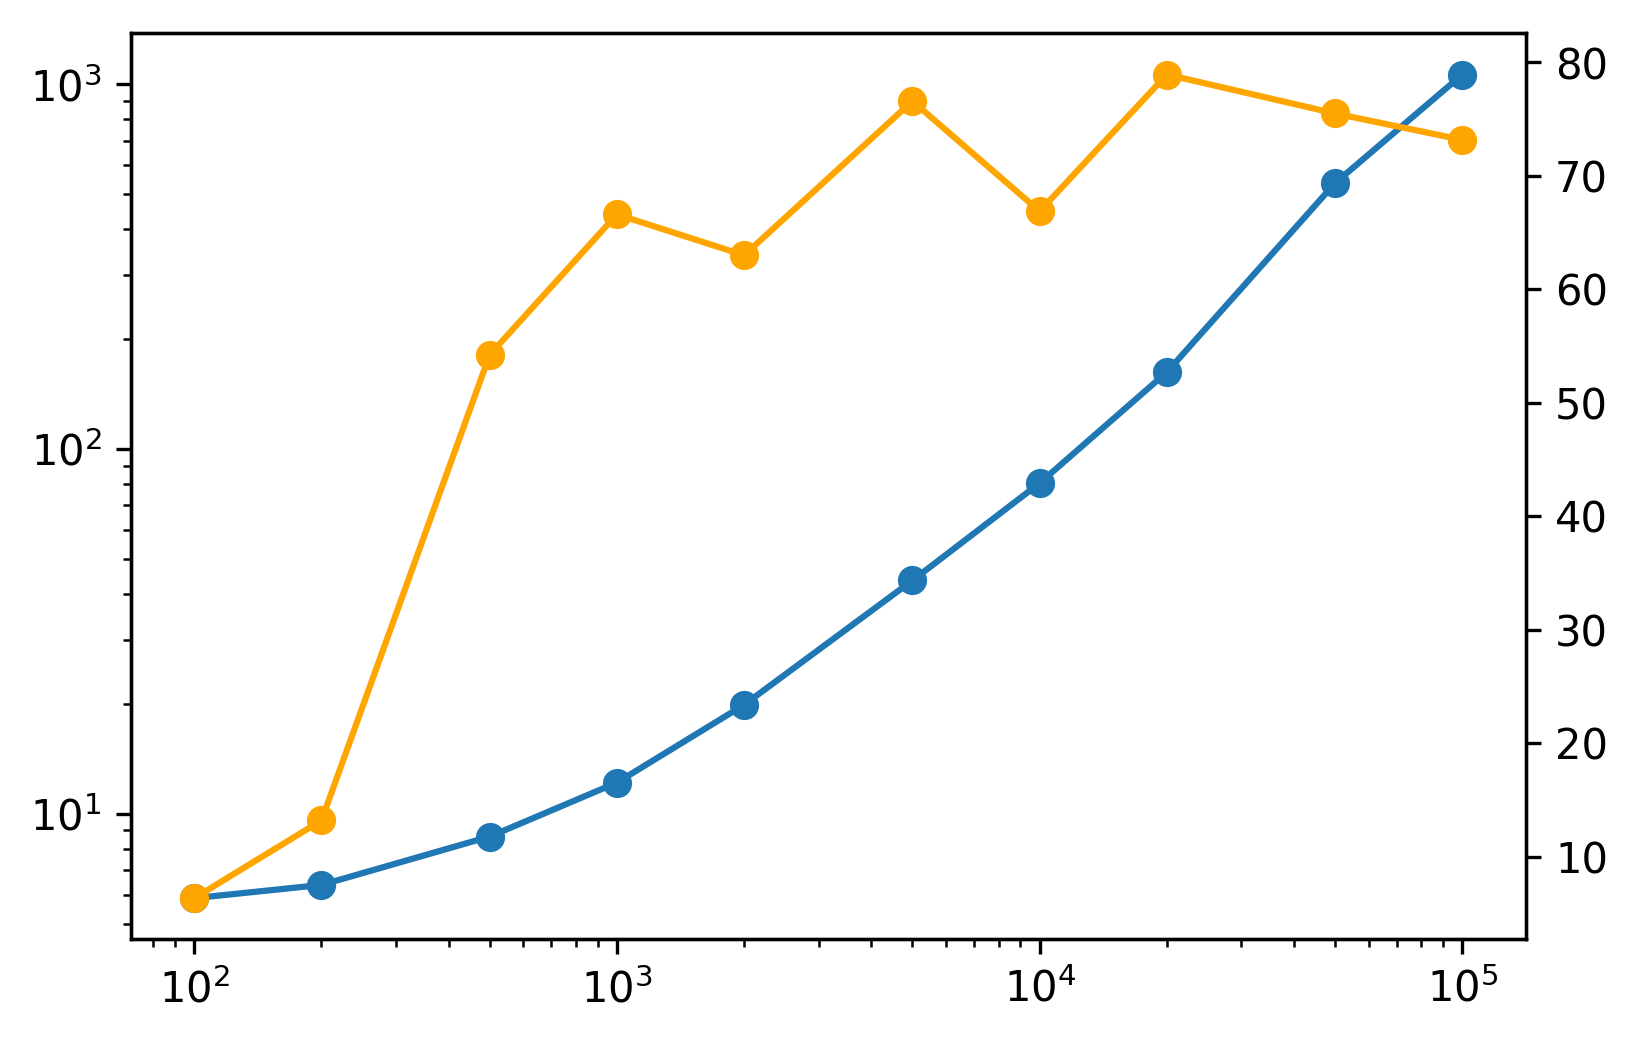

In [106]:
plt.loglog(nItersList, rtimesList,'o-');
plt.twinx()
plt.semilogx(nItersList, valAccList,'o-', color='orange');

## Predicting output for test data

Most of the time prediction script would be separate from training script (we need not to train on same data again) but I am providing both in same script here; as I am not sure if we can create multiple notebook and somehow share data between them in Kaggle.

In [47]:
def de_median(x):
    return x - np.median(x)

In [ ]:
predicted_output = list(regressor.predict(input_fn=test_input_fn))
# x = list(predicted_output)

In [ ]:
r2_score(test_df['flux'].values,predicted_output)*100

In [ ]:
print('Full notebook took {} seconds'.format(time()-start0))